# Unit 5.2. Training a Multilayer Perceptron in PyTorch & Lightning

## Part 1. Preamble -- Basic & General Dataset Inspection

- Recap from unit 4
- In practice: recommended to do it for each new dataset you are working with
- Do it in a notebook here so we can focus on the core code in part 2 and part 3

## 1) Installing Libraries

In [1]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,torch,lightning

Python implementation: CPython
Python version       : 3.10.10
IPython version      : 8.17.2

numpy     : 1.26.2
pandas    : 2.1.4
matplotlib: 3.8.2
torch     : 2.1.2+cu121
lightning : 2.1.4



## 2) Loading the dataset

- MNIST website: http://yann.lecun.com/exdb/mnist/

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

train_dataset = datasets.MNIST(
    root="./mnist", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = datasets.MNIST(
    root="./mnist", train=False, transform=transforms.ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 216020363.73it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 51789522.80it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 194130284.82it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 10696534.96it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [3]:
len(train_dataset)

60000

In [4]:
len(test_dataset)

10000

### Create a validation set

In [5]:
from torch.utils.data.dataset import random_split

train_dataset, val_dataset = random_split(train_dataset, lengths=[55000, 5000])

In [6]:
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=64,
    shuffle=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False,
)

### Check label distribution

In [7]:
from collections import Counter

train_counter = Counter()
for images, labels in train_loader:
    train_counter.update(labels.tolist())
    
print("\nTraining label distribution:")
print(sorted(train_counter.items()))

    
val_counter = Counter()
for images, labels in val_loader:
    val_counter.update(labels.tolist())
    
print("\nValidation label distribution:")
print(sorted(val_counter.items()))
    

test_counter = Counter()
for images, labels in test_loader:
    test_counter.update(labels.tolist())

print("\nTest label distribution:")
print(sorted(test_counter.items()))


Training label distribution:
[(0, 5435), (1, 6154), (2, 5446), (3, 5608), (4, 5332), (5, 4996), (6, 5452), (7, 5766), (8, 5356), (9, 5455)]

Validation label distribution:
[(0, 488), (1, 588), (2, 512), (3, 523), (4, 510), (5, 425), (6, 466), (7, 499), (8, 495), (9, 494)]

Test label distribution:
[(0, 980), (1, 1135), (2, 1032), (3, 1010), (4, 982), (5, 892), (6, 958), (7, 1028), (8, 974), (9, 1009)]


## 3) Zero-rule baseline (majority class classifier)

In [8]:
majority_class = test_counter.most_common(1)[0]
print("Majority class:", majority_class[0])

baseline_acc = majority_class[1] / sum(test_counter.values())
print("Accuracy when always predicting the majority class:")
print(f"{baseline_acc:.2f} ({baseline_acc*100:.2f}%)")

Majority class: 1
Accuracy when always predicting the majority class:
0.11 (11.35%)


## 4) A quick visual check

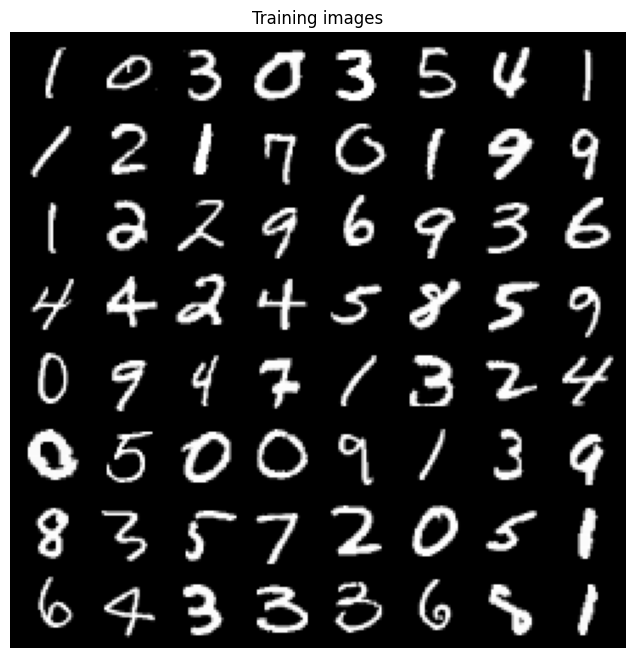

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torchvision


for images, labels in train_loader:  
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64], 
    padding=2,
    normalize=True),
    (1, 2, 0)))
plt.show()